# Neural Networks in Python: From Sklearn to PyTorch and Probabilistic Neural Networks.

This tutorial covers different concepts related to neural networks with Sklearn and PyTorch. Neural networks have gained lots of attention in machine learning (ML) in the past decade with the development of deeper network architectures (known as deep learning). These models have even surpassed human capabilities in different vision and natural language processing datasets. For example a neural network trained on the well-known ImageNet object recognition database tells the difference between different breeds of dog with an error rate of just 4.58%. For comparison, the typical human gets around 5%. Read more about this here: 
https://www.theguardian.com/global/2015/may/13/baidu-minwa-supercomputer-better-than-humans-recognising-images

In this tutorial, we will first see how easy it is to train multilayer perceptrons in Sklearn with the well-known handwritten dataset MNIST. Things will then get a bit more advanced with PyTorch. We will first train a network with four layers (deeper than the one we will use with Sklearn) to learn with the same dataset and then see a little bit on Bayesian (probabilistic) neural networks. This tutorial assumes some basic knowledge of python and neural networks.

## What exactly are scikit-learn and PyTorch?

* Scikit-learn is a free software machine learning library for Python which makes unbelievably easy to train traditional ML models such as Support Vector Machines or Multilayer Perceptrons. 

* PyTorch is an open source machine learning library based on Torch, used for coding deep learning algorithms and primarily developed by Facebook's artificial intelligence research group. 

## ...and why should I care about Pytorch and Probabilistic Neural Networks?

1. **Many people prefer PyTorch to TensorFlow**. This is mainly because PyTorch allows for dynamic computational graphs (meaning that you can change the network architecture during running time, which is quite useful for certain neural network architectures) and it's very easy to learn (building ML models is actually very intuitive, as we will see). 

2. **ML needs to account for uncertainty!** Have you heard of probabilistic programming? It's a programming paradigm in which you can easily specify probabilistic models and perform inference on them. These languages greatly simplify the task of creating systems that handle uncertainty. For example, Pyro (from Uber AI Labs) enables flexible and expressive deep probabilistic modeling, unifying the best of modern deep learning and Bayesian modeling. And while we won't touch on probabilistic programming in this tutorial, you may want to know why probabilistic approaches are so needed in ML and why these languages are growing so quickly. The network we are going to build doesn't use probabilistic programming languages, but it's still probabilistic!


Anyway... let's get to it, shall we? 

Let's start with Sklearn and then we will move to PyTorch and finally include some notions of PNNs into the equation...

## Multilayer Perceptron in Sklearn to classify handwritten digits
The dataset we are going to use (MNIST) is still one of the most used benchmarks in computer vision tasks, where one needs to go from an image of a handwritten digit to the digit itself (0, 1, 2...). This could be done with a Convolutional Neural Network, which are the state-of-the-art method for discovering spatial patterns. However, to simplify this tutorial what we will do is to unroll/flatten the image into a vector (images are 28x28 pixels, which will result in a vector of size 784, where each element represents a pixel) and use a fully connected neural network. 

What we are aiming to do is to build a mathematical function that can predict the characteristic of interest (digit) based on the pixels. This is where neural networks come in handy, as they are mathematical functions that are universal approximators (can approximate any function given enough degrees of freedom). Neural networks implement linear functions. However, they can also include nonlinear transformations known as activation units (for example a logistic function), which allows them to provide non-linear decision regions! 

Let's see how easy it would be to do so in Sklearn... We will build both a simple linear perceptron and a multilayer perceptron with the default activation functions in Sklearn, which are the so-called ReLU. When you run the code don't forget to compare the accuracy of both models and play around with the hyperparameters and network architecture!

In [1]:
# we import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load and partition MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# you can check how if we change random_state (seed for test/train split)
# the accuracy of our models also change!
X_train, X_test, y_train, y_test = train_test_split(X/255., y, test_size = 0.20, random_state=1)

# first let's use a very simple linear perceptron: we set the hyperparams and train
# a perceptron does not use activation units which means it's a completely linear model
per = Perceptron(random_state=1, max_iter=30, tol=0.001)
per.fit(X_train, y_train)

# we predict with our built perceptron
yhat_train_per = per.predict(X_train)
yhat_test_per = per.predict(X_test)

print(f"Perceptron: Accuracy in train is %.2f" % (accuracy_score(y_train, yhat_train_per)))
print(f"Perceptron: Accuracy in test is %.2f" % (accuracy_score(y_test, yhat_test_per)))

# now let's try a multilayer perceptron
# the default activation function is ReLU
mlp = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1, hidden_layer_sizes=(784, 100, 2))
mlp.fit(X_train, y_train)

# predict with our new classifier
yhat_train_mlp = mlp.predict(X_train)
yhat_test_mlp = mlp.predict(X_test)

print(f"Multilayer Perceptron: Accuracy in train is %.2f" % (accuracy_score(y_train, yhat_train_mlp)))
print(f"Multilayer Perceptron: Accuracy in test is %.2f" % (accuracy_score(y_test, yhat_test_mlp)))

Perceptron: Accuracy in train is 0.90
Perceptron: Accuracy in test is 0.88
Iteration 1, loss = 0.78419346
Iteration 2, loss = 0.40267290
Iteration 3, loss = 0.35031849
Iteration 4, loss = 0.20264795
Iteration 5, loss = 0.16538864
Iteration 6, loss = 0.13211615
Iteration 7, loss = 0.11156361
Iteration 8, loss = 0.09866746
Iteration 9, loss = 0.09292615
Iteration 10, loss = 0.08311959
Iteration 11, loss = 0.06895674
Iteration 12, loss = 0.07361528
Iteration 13, loss = 0.05744087
Iteration 14, loss = 0.05349432
Iteration 15, loss = 0.04941034
Iteration 16, loss = 0.04276114
Iteration 17, loss = 0.04357448
Iteration 18, loss = 0.03478134
Iteration 19, loss = 0.04222849
Iteration 20, loss = 0.04449409
Iteration 21, loss = 0.03602080
Iteration 22, loss = 0.03441990
Iteration 23, loss = 0.02674086
Iteration 24, loss = 0.02061768
Iteration 25, loss = 0.03528637
Iteration 26, loss = 0.03569825
Iteration 27, loss = 0.02812387
Iteration 28, loss = 0.02348340
Iteration 29, loss = 0.02946454
Iterat

/home/maria/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Multilayer Perceptron: Accuracy in train is 1.00
Multilayer Perceptron: Accuracy in test is 0.97


## A standard Neural Network in PyTorch to classify MNIST
The Torch module provides all the necessary tensor operators you will need to build your first neural network in PyTorch. And yes, in PyTorch everything is a Tensor. This is because PyTorch is mostly used for deep learning, as opposed to Sklearn, which implements more traditional and shallower ML models.

Now we will use a similar architecture to the one we used before with Sklearn but deeper, this means that it will need to train many more parameters. We could have built exactly this same model in Sklearn, but it would have taken longer to train, as we will be using GPU to train our model in PyTorch. PyTorch would also be helpful when training more complex architectures (such as the previously mentioned Convolutional Neural Networks, which would be the ideal way of handling this computer vision dataset).


In [2]:
# you will need the torch and torchvision packages, so don't forget to install them on your machine!
# firstly, we import the necessary packages
import torch
import torchvision
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch import nn

In [3]:
# Then we set some global variables that we will need later on. We are going to
# work with MNIST(the famous handwritten digit classification dataset, in which our
# data comes in the form of images)

# division of the dataset in batches of 100 data points to be able to fit them in memory
BATCH_SIZE = 100
# 1 epoch = training with all batches in the dataset
TRAIN_EPOCHS = 10
# number of classes in the dataset
CLASSES = 10
# size in pixels of our images, in this case 28 pixels height and 28 pixels width
INPUT_HEIGHT = 28
INPUT_WIDTH = 28
# TOTAL_INPUT = INPUT_HEIGHT * INPUT_WIDTH
TOTAL_INPUT = 784
# number of cases for train and test
TRAIN_SIZE = 50000
TEST_SIZE = 10000

In [4]:
# First, we define our model through a class since it's the recommended way to build the
# computational graph (just think of this graph as a nice and clean way to think about 
# mathematical expressions). The class header contains the name of the class FCN 
# (Fully Connected Network) and the parameter nn.Module which basically indicates that
# we are defining a customized neural network.

class FCN(nn.Module):
    # FCN is the class for my fully connected network, it inherits from nn.Module, which is the base
    # class for all neural network modules in Torch.

    # The next step is to define the initializations that will be performed upon creating an instance
    # of the customized neural network. 
    def __init__(self, n_hidden=600, n_classes=CLASSES):
        super().__init__()
        # all we do is to define our model, which is going to have four layers (l1 to l4). 
        # The number of neurons in hidden layers is n_hidden. nn.linear includes weights and biases.
        self.l1 = nn.Linear(INPUT_HEIGHT*INPUT_WIDTH, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_hidden)
        self.l4 = nn.Linear(n_hidden, n_classes)

    # This function is where the magic happens. This is where the data enters and is fed
    # into the computational graph (i.e., the neural network structure we have built). 
    def forward(self, x):
        # propagates forward the data to the output neuron
        x = x.view(-1, INPUT_HEIGHT*INPUT_WIDTH)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

In [5]:
# now we are going to define two independent functions to train and test the network with our data
# we will use them later in the main part of the code
def train_fcn(net, optimizer, epoch, train_loader):
    # trains the network with one batch at a time
    net.train()
    total_loss = 0.0
    total = 0.0
    correct = 0.0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        # sets gradients of all model parameters to zero
        net.zero_grad()
        # propagate inputs forward to get a prediction
        pred = net.forward(images.cuda().view(-1, 784))
        # compute loss and stats of performance, we transform the classes using a hot labels
        # encoding (which is a common approach to solve multiclass problems) and use binary cross entropy
        loss = F.binary_cross_entropy_with_logits(
            pred, F.one_hot(labels.cuda(), CLASSES).float())
        total_loss += loss
        total += labels.size(0)
        correct += (pred.argmax(-1) == labels.cuda()).sum().item()
        # propagate backward
        loss.backward()
        # optimise parameters of the network
        optimizer.step()
    # print performance for this epoch
    print(
        f"Epoch {epoch}: loss {total_loss:.5f} accuracy {correct / total * 100:.5f}")

def test_fcn(net, test_loader):
    # computes test accuracy
    total = 0.0
    correct = 0.0
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        pred = net.forward(images.cuda().view(-1, 784))
        total += labels.size(0)
        correct += (pred.argmax(-1) == labels.cuda()).sum().item()
    print(f"Test accuracy: {correct / total * 100:.5f}")

In [7]:
# And this is it... where we train and test our network!
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Comment if you want to run on CPU
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# convert to tensor and normalise data
tr = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

# Set download=True to download the dataset from the internet
mnist = torchvision.datasets.mnist.MNIST(
    root='images', transform=tr, download=True)

# divide data in train and test
train_set, test_set = torch.utils.data.random_split(
    mnist, lengths=(TRAIN_SIZE, TEST_SIZE))

# load the batches
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

# create an instance of our neural network
fcn = FCN().to(DEVICE)

# set the optimiser (Stochastic Gradient Descent) with the hyperparams
optim = torch.optim.SGD(fcn.parameters(recurse=True), lr=0.1, momentum=0.95)

print("Training...")
# train and test!
for epoch in range(TRAIN_EPOCHS):
    train_fcn(fcn, optim, epoch, train_loader)
test_fcn(fcn, test_loader)
# ...and we are DONE!

Training...
Epoch 0: loss 63.58544 accuracy 83.20400
Epoch 1: loss 43.83603 accuracy 94.86000
Epoch 2: loss 41.14808 accuracy 96.36200
Epoch 3: loss 39.80867 accuracy 97.15400
Epoch 4: loss 38.93843 accuracy 97.51600
Epoch 5: loss 37.80767 accuracy 98.27600
Epoch 6: loss 37.49516 accuracy 98.35600
Epoch 7: loss 37.19496 accuracy 98.48200
Epoch 8: loss 36.79926 accuracy 98.71400
Epoch 9: loss 36.43094 accuracy 98.94800
Test accuracy: 97.86000


To recap... We defined the class with the architecture of our neural network, a train and test functions and the main part of our code (which was really simple: download data, partition, preprocess, set optimiser and hyperparameters and train and test). We can see that we achieve really good accuracy in test after training for 10 epochs. In this case, we used a network composed of 4 layers with ReLU activation functions, which seems to work really well for our dataset. However, these and other hyperparameters (such as learning rate) need to be optimised in order to find the best configuration for each specific problem. I will leave it to you to play with these hyperparameters and compare the accuracies of our network with for example 3 and 5 layers. 

Now, let's move to the probabilistic version.

## Wait a moment... What is a Probabilistic Neural Network anyway?

Bayesian neural networks (from now on BNNs) use the Bayes rule to create a probabilistic neural network. BNNs can be defined as feedforward neural networks that include *notions of uncertainty in their parameters*. Let us go back for a moment to the equation of a simple linear perceptron: y = W*X + b, where X is our input data and y our targets. The parameters to learn are W and b and these are usually optimised through maximum likelihood estimation. However, instead of having simply one scalar parameter for b (or any of the elements in W), we could learn a distribution (Normal, Laplace, etc.). In the case of a Normal distribution, we will then define each parameter with a mean and standard deviation. This is the idea behind the paper "Weight Uncertainty in Neural Networks" from Blundell et. al. at Google: The BNN learns a distribution for every network parameter. 

This is useful for several reasons: 

* Firstly, **it allows our network to produce uncertainty outcomes or even say "I don't know"**. Why is this important, you may ask? Just imagine that you have a system that distinguishes dogs from cats (what a cliché...), what do you think will happen if you input let's say a picture of yourself? Well, it's going to choose either dog and cat, which initially may sound cool, but let's face it, it's not very useful in practice. So the first advantage of a probabilistic neural network is to be able to say: "Actually, I'm not sure which class this test data point belongs to!"

* The second cool advantage of BNNs is that they are **easy to prune**. For example, if after training our network we have a weight: 1) which mean is close to zero and 2) we are very sure about it (this is, uncertainty is very low) we can prune the neuron associated to it (easy peasy!). Pruning a model is usually important in real-world applications.

* **It regularises the weights**, improving performance and yielding comparable performance to the commonly used dropout technique.

On the other hand, not everything is greener on the other side. BNNs tend to be slower than their non-probabilistic analogues at classifying new cases and they require more memory space to store the model.

Now... **is building a BNN going to get much more difficult than our previous example?** A bit, but let's clarify some concepts first.

1. The first thing you need to understand about these networks is that to test them with a data point we will need to **sample from the distribution of parameters** (or with the expected value otherwise). In practice, these network work then as an ensemble, producing multiple results for the same data point (this coming from the fact that we are sampling several times from the distribution of parameters). These outputs can be then averaged to get the final prediction and a notion of uncertainty in the prediction.

2. The second concept is that as the word Bayesian indicates, we impose a prior on the network parameters. We usually define the distribution (e.g. Normal) and we initalise the parameters with the prior. In this case, we use an engineered mixture of Gaussians for the prior.

Now, this tutorial will only give you an intuition of how BNNs work. We won't dive much deeper into variational inference, which is the approach these network use to approximate the distribution of learnt parameters. At this point, you just need to know that variational inference is one of the most common approaches (apart from sampling) to approximate a posterior distribution (you may have heard of variational autoencoders before). For more information please refer to the paper "Weight Uncertainty in Neural Networks" and get deeper into the theory behind it! The implementation in this paper is inspired by several other implementations of the same idea, specially the one in https://www.nitarshan.com/bayes-by-backprop/.

What we need for this code is to define 1. the architecture (number of layers + the definition of a Bayesian layer), 2. a loss function to define how to account for misclassification errors and use during learning and 3. the train and test functions.

In [8]:
# we need a few more imports for this part...
import math
import numpy as np

In [9]:
# number of times we will sample from the distribution of parameters
SAMPLES = 10
# these are needed for the mixture of Gaussians for the prior
PI = 0.5
SIGMA1 = torch.cuda.FloatTensor([math.exp(-0)])
SIGMA2 = torch.cuda.FloatTensor([math.exp(-6)])
NUM_BATCHES = len(train_loader)

In [10]:
# Our Bayesian NN is going to be similarly defined than our previous class FCN...
class BNN(nn.Module):
    # As you can see it's almost the same, we just changed nn.linear for BayesianLinear
    # which is a type of layer that we will need to define later...
    def __init__(self, n_hidden=600, n_classes=CLASSES):
        super().__init__()
        self.l1 = BayesianLinear(INPUT_HEIGHT*INPUT_WIDTH, n_hidden)
        self.l2 = BayesianLinear(n_hidden, n_hidden)
        self.l3 = BayesianLinear(n_hidden, n_hidden)
        self.l4 = BayesianLinear(n_hidden, n_classes)

    # the forward function is also very very similar the main difference is the attribute sample. 
    # This attribute is needed because we have now a distribution of parameters and everytime we 
    # propagate forward in our network we need to sample from the distributions of parameters.
    # If we don't sample we simply take the expected value (mean)
    def forward(self, x, sample=False):
        x = x.view(-1, INPUT_HEIGHT*INPUT_WIDTH)
        x = F.relu(self.l1(x, sample))
        x = F.relu(self.l2(x, sample))
        x = F.relu(self.l3(x, sample))
        x = F.log_softmax(self.l4(x, sample), dim=1)
        return x

    # We also need some additional functions. These implement equations needed to perform 
    # variational inference,which we use to approximate the posterior of the parameters
    # (i.e. in practice, learn the distribution of the parameters) .
    # The next two functions are defined per layer and the final result is the sum of each layer
    def log_prior(self):
        return self.l1.log_prior + self.l2.log_prior + self.l3.log_prior + self.l4.log_prior

    def log_variational_post(self):
        return self.l1.log_variational_post + self.l2.log_variational_post + self.l3.log_variational_post + self.l4.log_variational_post

    # ELBO stands for Evidence Lower BOund. This function implements the loss used to learn
    # the distribution over the parameters of the network. The equation is obtained through
    # the use of variationalinference, which as we said we won't touch that much on.
    def elbo(self, input, target, samples=SAMPLES, batch_size=BATCH_SIZE):
        outputs = torch.zeros(samples, batch_size, CLASSES)
        log_priors = torch.zeros(samples)
        log_variational_post = torch.zeros(samples)
        # as you can see, here we sample multiple times and we thus have multiple predictions
        # for the same data
        for i in range(samples):
            outputs[i] = self(input, sample=True)
            log_priors[i] = self.log_prior()
            log_variational_post[i] = self.log_variational_post()
        # average log-priors and log-posteriors
        log_prior = log_priors.mean()
        log_variational_post = log_variational_post.mean()
        # we take the mean of the predictions using outputs.mean(0)
        # calculate Negative Log Likelihood loss
        nll = F.nll_loss(outputs.mean(0), target, reduction='sum')
        # calculate KL divergence
        kl = (log_variational_post - log_prior) / NUM_BATCHES
        # this is the ELBO loss function (defined in the paper)
        return kl + nll

In [11]:
# ok, but we need to define the BayesianLinear layer!
class BayesianLinear(nn.Module):

  def __init__(self, dim_in, dim_out):
    super(BayesianLinear, self).__init__()
    self.dim_in = dim_in
    self.dim_out = dim_out

    # now in this case since we will assume a Gaussian distribution of our parameters we will need two
    # parameters (mean and std), however, in the paper it is shown that it's more efficient to use rho
    # which is a transformation of sigma (the std). We thus initialise the means and scales (rho).
    self.w_mu = nn.Parameter((-0.2 - 0.2) * torch.rand(dim_out, dim_in) + 0.2)
    self.w_rho = nn.Parameter((-5. + 4.) * torch.rand(dim_out, dim_in) - 4.)
    # we create a Gaussian distribution for w
    self.w = Gaussian(self.w_mu, self.w_rho)

    # same is applicable to the biases
    self.b_mu = nn.Parameter((-0.2 - 0.2) * torch.rand(dim_out) + 0.2)
    self.b_rho = nn.Parameter((-5. + 4.) * torch.rand(dim_out) - 4.)
    self.b = Gaussian(self.b_mu, self.b_rho)

    # the prior distribution is defined in the paper as an engineered mixture of two Gaussians, where
    # PI is the parameter for the mixture
    self.w_prior = ScaledGaussianMixture(PI, SIGMA1, SIGMA2)
    self.b_prior = ScaledGaussianMixture(PI, SIGMA1, SIGMA2)
    self.log_prior = 0
    self.log_variational_post = 0 

  def forward(self, input, sample=False, calc_log_prob=False):

    if self.training or sample:  # while training or sampling
      w = self.w.sample()
      b = self.b.sample()
    else:
      w = self.w.mu
      b = self.b.mu

    if self.training or calc_log_prob:
      # calculate logprob of prior for sampled weights
      self.log_prior = self.w_prior.log_prob(w) + self.b_prior.log_prob(b)
      # calculate logprob of posterior (w, b) distributions
      self.log_variational_post = self.w.log_prob(w) + self.b.log_prob(b)
    else:
      self.log_prior, self.log_variational_post = 0, 0

    return F.linear(input, w, b)


In [12]:
# we now define the type of object that our BayesianLinear function is based on
class Gaussian:
    def __init__(self, mu, rho):
        self.mu = mu
        self.rho = rho
        self.normal = torch.distributions.Normal(0, 1)

    @property
    def sigma(self):
        # log1p <- ln(1 + input)
        return torch.log1p(torch.exp(self.rho))  

    # we implement how to sample from a Normal distribution
    def sample(self):
        epsilon = self.normal.sample(self.mu.size())
        return self.mu + self.sigma * epsilon

    def log_prob(self, input):
        return (-math.log(math.sqrt(2 * math.pi))
            - torch.log(self.sigma)
            - ((input - self.mu) ** 2) / (2 * self.sigma ** 2)).sum()

class ScaledGaussianMixture:
    def __init__(self, pi, sigma1, sigma2):
        self.pi = pi
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.gaussian1 = torch.distributions.Normal(0, sigma1)
        self.gaussian2 = torch.distributions.Normal(0, sigma2)

    def log_prob(self, input):
        prob1 = torch.exp(self.gaussian1.log_prob(input))
        prob2 = torch.exp(self.gaussian1.log_prob(input))
        return (torch.log(self.pi * prob1 + (1 - self.pi) * prob2)).sum()


In [13]:
# now let's reimplement our train and test functions
def train_bnn(net, optimizer, epoch, train_loader):
    # trains the network with one batch at a time
    net.train()
    total_loss = 0.0
    total = 0.0
    correct = 0.0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        # sets gradients of all model parameters to zero
        net.zero_grad()
        # propagate inputs forward to get a prediction
        pred = net.forward(images.cuda().view(-1, 784),False)
        # compute loss and stats of performance
        loss = net.elbo(images, labels)
        total_loss += loss
        total += labels.size(0)
        correct += (pred.argmax(-1) == labels.cuda()).sum().item()
        # propagate backward
        loss.backward()
        # optimise parameters of the network
        optimizer.step()
    # print performance for this epoch
    print(
        f"Epoch {epoch}: loss {total_loss:.5f} accuracy {correct / total * 100:.5f}")    
    
def test_bnn(net, test_loader):
    # computes test accuracy for our ensemble by sampling from the distribution of parameters
    net.eval()
    correct = 0
    corrects = np.zeros(SAMPLES, dtype=int)
    
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = torch.zeros(SAMPLES, BATCH_SIZE, CLASSES)
        # sampling!
        for i in range(SAMPLES):
            outputs[i] = net(images, sample=True)
        #outputs[SAMPLES] = net(images, sample=False)
        output = outputs.mean(0)
        preds = outputs.max(2, keepdim=True)[1]
        pred = output.max(1, keepdim=True)[1] # index of max log-probability
        corrects += preds.eq(labels.view_as(pred)).sum(dim=1).squeeze().cpu().numpy()
        correct += pred.eq(labels.view_as(pred)).sum().item()
    for index, num in enumerate(corrects):
        if index < SAMPLES:
            print('Component {} of Ensemble Accuracy: {}/{}'.format(index, num, TEST_SIZE))
        else:
            print('Posterior Mean Accuracy: {}/{}'.format(num, TEST_SIZE))
    print('Ensemble Accuracy: {}/{}'.format(correct, TEST_SIZE))


In [14]:
print("Be patient, BNNs take longer to train!")

bnn = BNN().to(DEVICE)
optimizer = torch.optim.Adam(bnn.parameters(), lr=0.001)
for epoch in range(TRAIN_EPOCHS):
    train_bnn(bnn, optimizer, epoch, train_loader)
test_bnn(bnn, test_loader)
# that's all folks!

Be patient, BNNs take longer to train!
Epoch 0: loss 4719021.00000 accuracy 87.88800
Epoch 1: loss 4301292.00000 accuracy 95.32800
Epoch 2: loss 3883627.25000 accuracy 96.80800
Epoch 3: loss 3447513.00000 accuracy 97.03000
Epoch 4: loss 3013602.50000 accuracy 96.78800
Epoch 5: loss 2606041.25000 accuracy 96.31600
Epoch 6: loss 2240311.00000 accuracy 95.77000
Epoch 7: loss 1918672.50000 accuracy 95.44800
Epoch 8: loss 1637334.12500 accuracy 95.10000
Epoch 9: loss 1394242.37500 accuracy 95.03600
Component 0 of Ensemble Accuracy: 9465/10000
Component 1 of Ensemble Accuracy: 9415/10000
Component 2 of Ensemble Accuracy: 9462/10000
Component 3 of Ensemble Accuracy: 9472/10000
Component 4 of Ensemble Accuracy: 9431/10000
Component 5 of Ensemble Accuracy: 9435/10000
Component 6 of Ensemble Accuracy: 9422/10000
Component 7 of Ensemble Accuracy: 9425/10000
Component 8 of Ensemble Accuracy: 9453/10000
Component 9 of Ensemble Accuracy: 9448/10000
Posterior Mean Accuracy: 9705/10000
Ensemble Accura

Now the question is: **How do we include the reject option in our network?** (this is, allow it to say "I don't know" or even show us the **digits with most uncertainty**): Well, again, we will sample many times (perhaps more than 10, let's say 1000), which will give us a much better estimation of the probability of a digit belonging to a class. Then we will need to set a threshold (let's say 0.2) and we will reject classifying every digit for which at least we are not a 20% sure that it belongs to a specific class! This is, if the network is not confident up to a threshold in its prediction, it will reject classifying that example. If you are interested in taking a better look at how to do this I recommend this tutorial: 
https://towardsdatascience.com/making-your-neural-network-say-i-dont-know-bayesian-nns-using-pyro-and-pytorch-b1c24e6ab8cd

In the next piece of code I show how to use this same idea to plot the digits with most uncertainty. In this case, I consider uncertainty as disagreement between members of my ensemble, so the least members of the ensemble agree on the classification of the digit, the most uncertain the model is on the class for that specific digit.

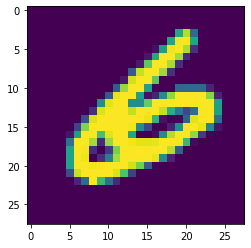

In [122]:
SAMPLES = 2000

def find_most_uncertain(net, test_loader):
    # computes test accuracy for our ensemble by sampling from the distribution of parameters
    net.eval()
    
    # we will use only the first batch
    images, labels = next(iter(test_loader))
    images, labels = images.to(DEVICE), labels.to(DEVICE)
    
    preds = torch.zeros(SAMPLES, BATCH_SIZE)
    
    # sampling!
    for i in range(SAMPLES):
        output = net(images, sample=True)
        preds[i] = torch.reshape(output.max(1, keepdim=True)[1], (-1,))
        
    id_min_agreement = 0
    min_agreement = SAMPLES
    
    for i in range(BATCH_SIZE):
        # how may members of the ensemble agree on the classification of this digit? 
        min_agreement_digit = torch.unique(preds[:,i], sorted=True, return_inverse=False, return_counts=True, dim=None)[1].min().cpu().numpy()
        # look for the digit with the least agreement
        if min_agreement_digit < min_agreement:
            id_min_agreement = i
            min_agreement = min_agreement_digit
    # print the digit     
    plt.imshow(  images[id_min_agreement].cpu().permute(1, 2, 0)  )
    
find_most_uncertain(bnn, test_loader)

As you can see the digit looks pretty weird, so it makes sense that the different members of the ensemble don't agree on the prediction. If you loop through all batches you could find even weirder digits. 

## Conclusions
Now we can see that the test accuracy is similar for all three networks (the network with Sklearn achieved 97%, the non bayesian PyTorch version achieved 97.64% and our Bayesian implementation obtained 96.93%). This, however, is quite different if we train our BNN for longer, as these usually require more epochs. However, independently of the accuracy, our BNN will be much more useful. As we said before, we can prune the network easily and we have a notion of uncertainty in our predictions (which we generate by sampling many times). The fact that the network in Sklearn with a more shallower architecture performs as well as the deeper version might indicate that more layers are not necessary. But to be sure of this we would need to explore much better the performance of these networks by testing different hyperparameter configuration. 

In this tutorial we have implemented three multilayer perceptrons with the well-known ReLU activation function, one with Sklearn and two with PyTorch and used one of the most well-known datasets in computer vision (MNIST, for handwritten digit recognition). We have also learnt about the usefulness of probabilistic neural networks and got some intuition about how to implement these!
